In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from PIL import Image
import cv2
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf 
from tensorflow import keras
from keras import layers, regularizers

# Hyperparameter
img_path_train = r'E:\IBM Machine Learning Course\5. DeepLearning Machine Learning\Final project\archive\seg_train\seg_train'
img_path_test = r'E:\IBM Machine Learning Course\5. DeepLearning Machine Learning\Final project\archive\seg_test\seg_test'

# label of images
classes = os.listdir(img_path_train)
print("Classes: ",classes)



Classes:  ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


buildings: 2191 images
forest: 2271 images
glacier: 2404 images
mountain: 2512 images
sea: 2274 images
street: 2382 images
Total images are 14034


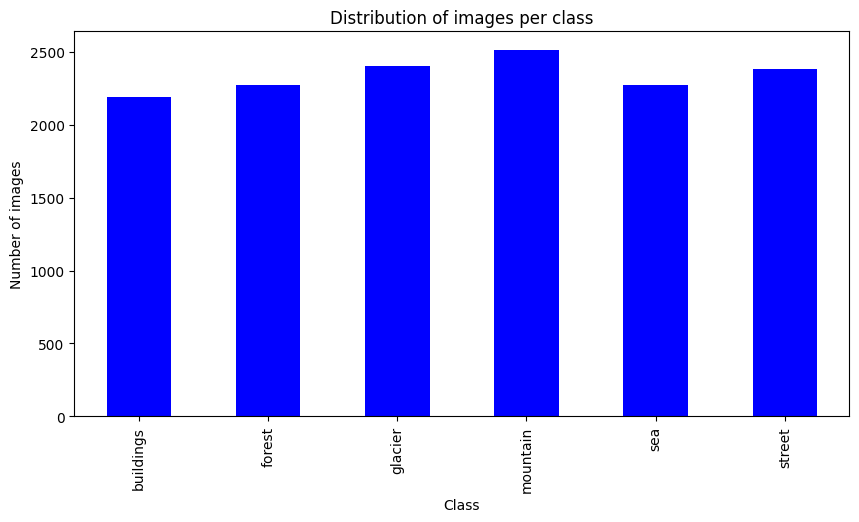

In [4]:
# Count the number of images in each class
image_counts = {cls: len(os.listdir(os.path.join(img_path_train, cls))) for cls in classes}
for cls, count in image_counts.items():
    print(f"{cls}: {count} images")
total = sum(image_counts.values())
print(f"Total images are {total}")

from matplotlib import pyplot as plt

# Plotting the distribution of images
plt.figure(figsize=(10, 5))
pd.Series(image_counts).plot(kind='bar', color='blue')
plt.title('Distribution of images per class')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.show()

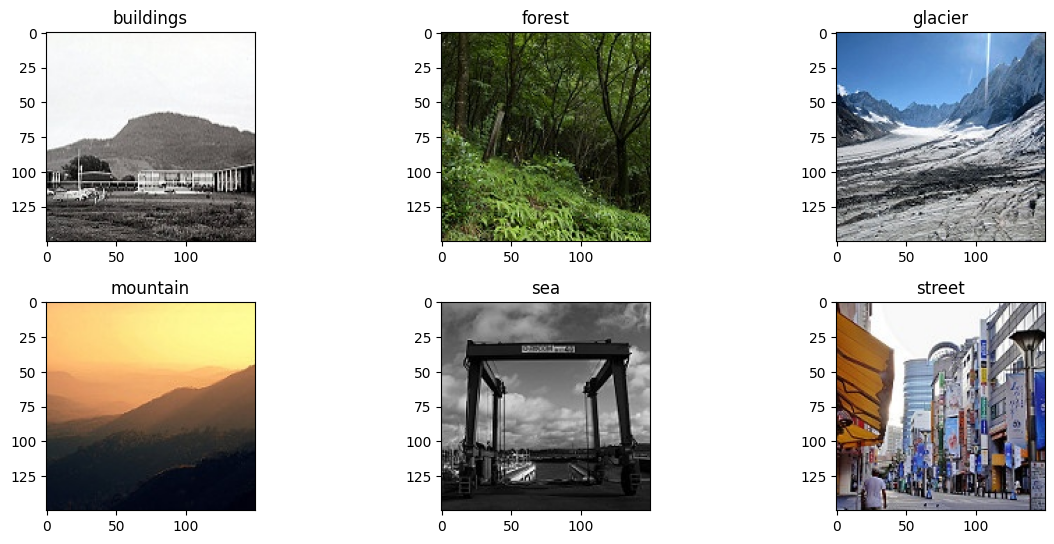

In [5]:
import matplotlib.pyplot as plt
import os
from PIL import Image

plt.figure(figsize=(12,8))
for i, cls in enumerate(classes):
    cls_path = os.path.join(img_path_train, cls)
    img_path = os.path.join(cls_path, os.listdir(cls_path)[0])
    img = Image.open(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)

plt.tight_layout()
plt.show()


In [6]:
img_size = (100,100)
batch_size = 16
epochs = 20

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    img_path_train,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=True,
)

validation_generator = test_datagen.flow_from_directory(
    img_path_test,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False
    
)

test_generator = test_datagen.flow_from_directory(
    img_path_test,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False,
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


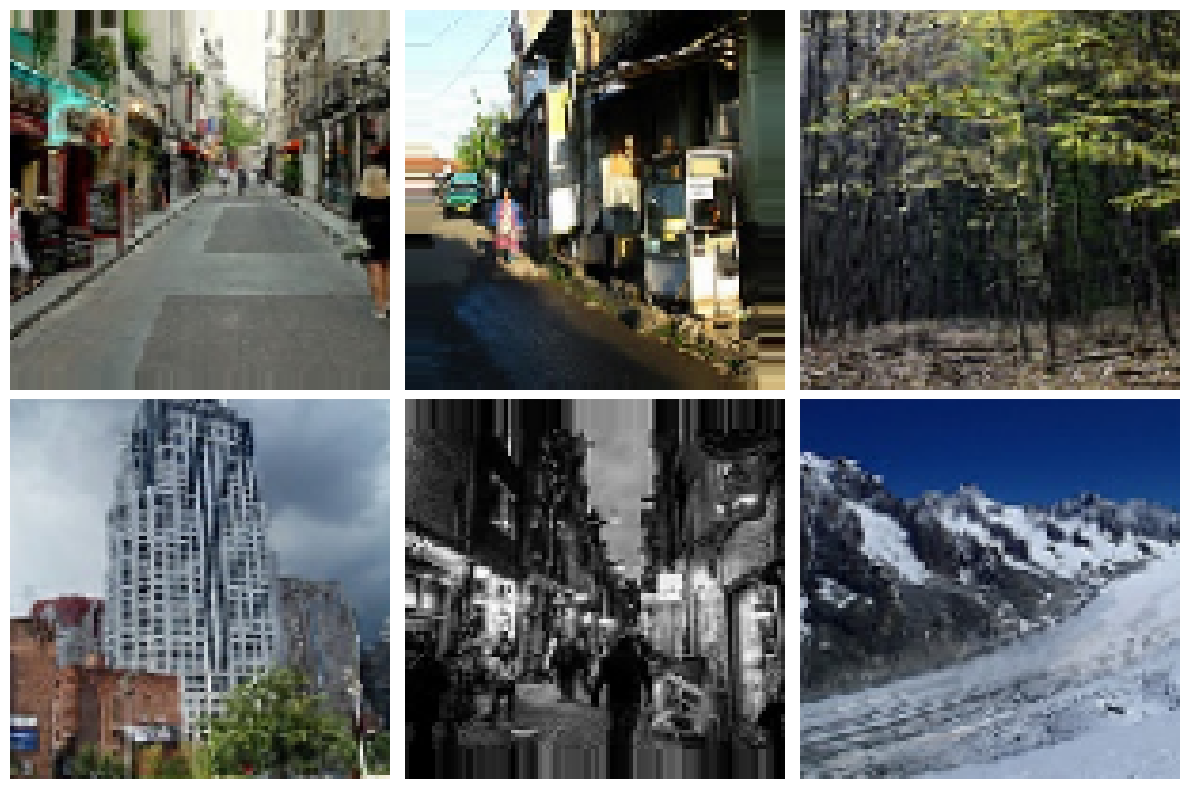

In [8]:
x_batch , y_batch = next(train_generator)

plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
x_batch.shape

(16, 100, 100, 3)

In [10]:

# Let's build a CNN using Keras' Sequential capabilities
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
#num_classes = 6

model = Sequential()

model.add(Conv2D(100, (3, 3), padding='same', input_shape=x_batch.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6)) 
model.add(Activation('softmax'))


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 100, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 98, 98, 100)    │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 98, 98, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 49, 49, 64)     │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    17,334,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 6)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,525,354 (66.85 MB)

 Trainable params: 17,525,354 (66.85 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
"""from keras.utils import plot_model
plot_model(model)"""

'from keras.utils import plot_model\nplot_model(model)'

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor = np.sqrt(0.1),
    patience = 10,
    verbose=1
)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(train_generator,
     epochs=epochs,
    validation_data=validation_generator,
     callbacks=[reduce_lr])

Epoch 1/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 952s 1s/step - accuracy: 0.4759 - loss: 1.2919 - val_accuracy: 0.6780 - val_loss: 0.8663 - learning_rate: 1.0000e-04
Epoch 2/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 874s 995ms/step - accuracy: 0.6655 - loss: 0.8856 - val_accuracy: 0.7220 - val_loss: 0.7524 - learning_rate: 1.0000e-04
Epoch 3/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 862s 981ms/step - accuracy: 0.7312 - loss: 0.7539 - val_accuracy: 0.7543 - val_loss: 0.6783 - learning_rate: 1.0000e-04
Epoch 4/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 881s 1s/step - accuracy: 0.7612 - loss: 0.6802 - val_accuracy: 0.8017 - val_loss: 0.5681 - learning_rate: 1.0000e-04
Epoch 5/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 883s 1s/step - accuracy: 0.7913 - loss: 0.5910 - val_accuracy: 0.8233 - val_loss: 0.5203 - learning_rate: 1.0000e-04
Epoch 6/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 884s 1s/step - accuracy: 0.7973 - loss: 0.5638 - val_accuracy: 0.8277 - val_loss: 0.5013 - learning_rate: 1.0000e-04
Epoch 7/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 880s 1s/step

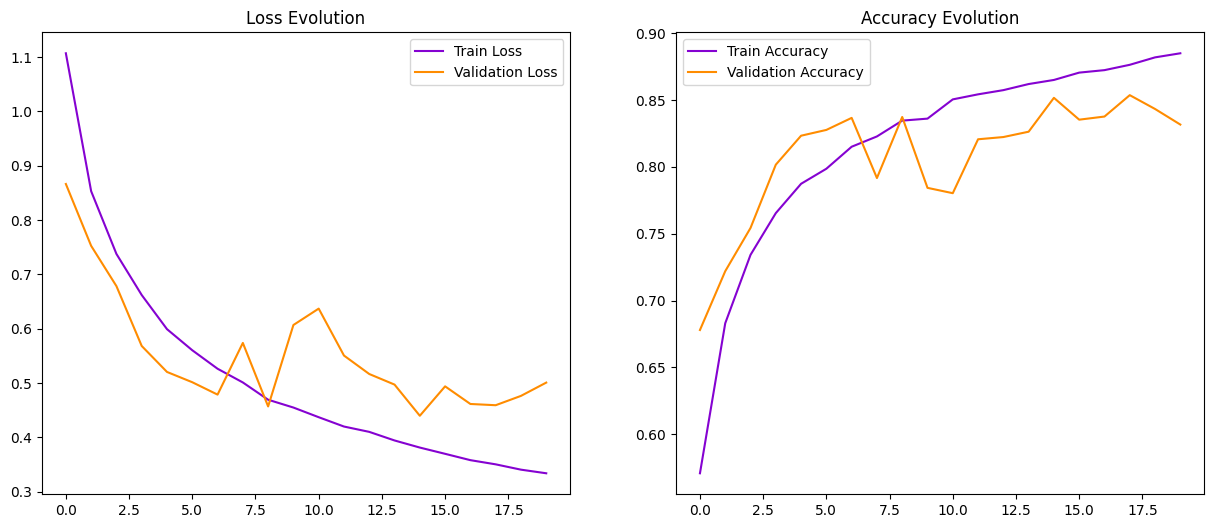

In [15]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(
    test_generator,  
    steps=test_generator.samples // batch_size  
)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 130ms/step - accuracy: 0.7943 - loss: 0.6225
Test Loss: 0.49921363592147827
Test Accuracy: 0.831885039806366


In [17]:
loss, accuracy = model.evaluate(train_generator)
print(f'Train accuracy: {accuracy * 100:.2f}%')

878/878 ━━━━━━━━━━━━━━━━━━━━ 129s 147ms/step - accuracy: 0.8870 - loss: 0.3200
Train accuracy: 88.86%


In [18]:
classes = {value: key for key, value in train_generator.class_indices.items()}
classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [19]:
classes = {value: key for key, value in train_generator.class_indices.items()}

188/188 ━━━━━━━━━━━━━━━━━━━━ 26s 136ms/step


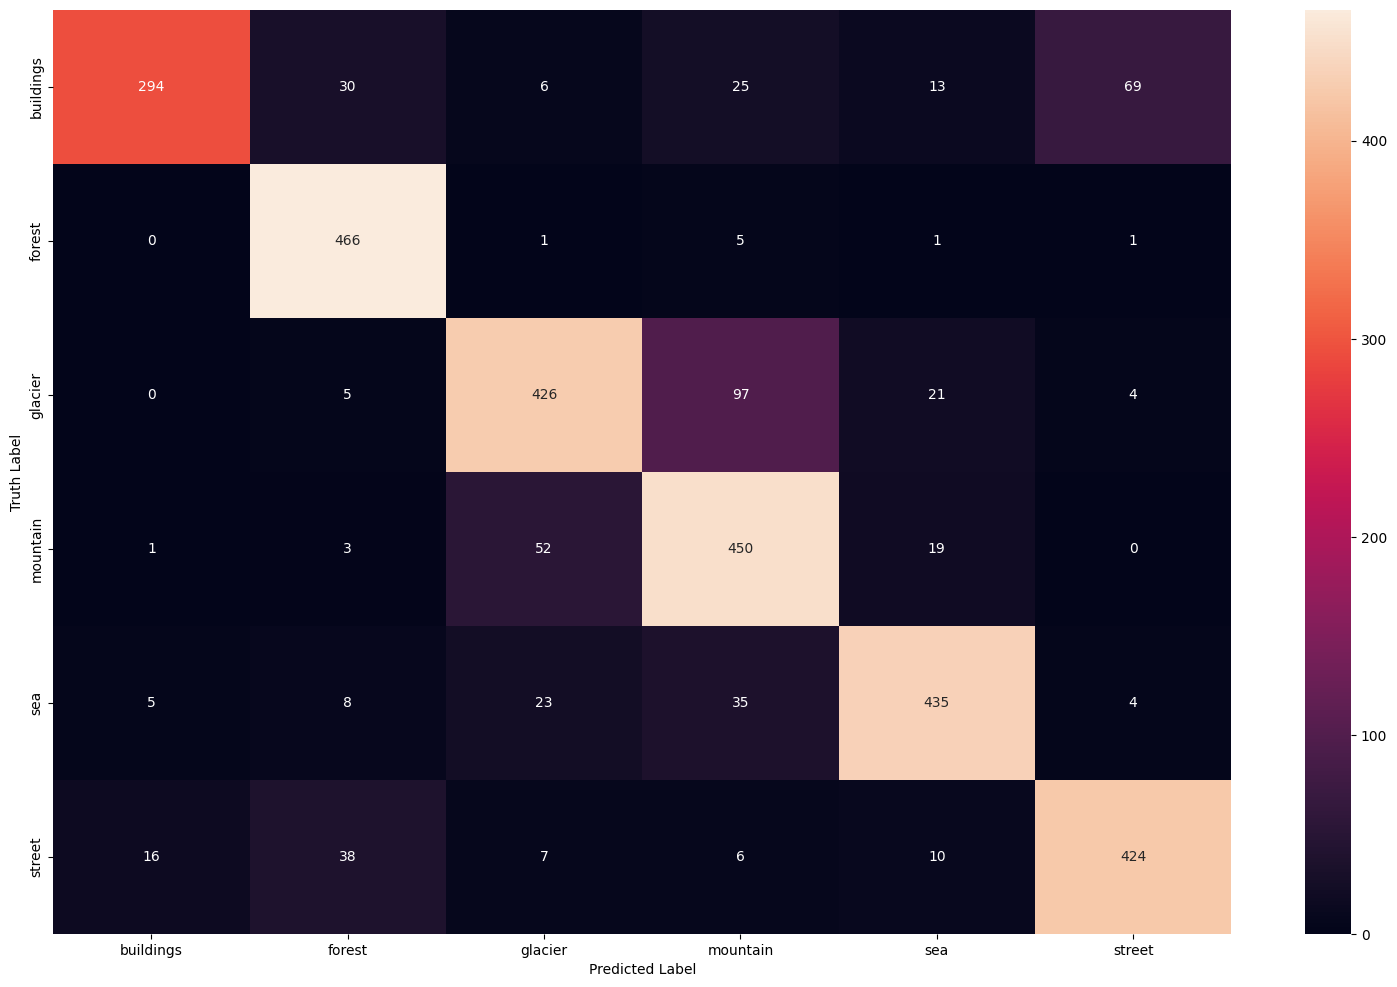

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
import seaborn as sns


predictions = model.predict(test_generator)
predictions = np.argmax(predictions, axis=1)

cm = confusion_matrix(validation_generator.classes, predictions)
#labels = list(classes.keys())
plt.figure(figsize=(19,12))
sns.heatmap(cm, annot=True, fmt='d',  xticklabels=classes.values(), yticklabels=classes.values())
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

## Make a prediction

In [22]:
from tensorflow.keras.preprocessing import image

def predict(img_path_train):

    
    label = list(classes.values())
    plt.figure(figsize=(12, 19))
    img = Image.open(img_path_train)
    resized_img = img.resize((100, 100))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

Print out the prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


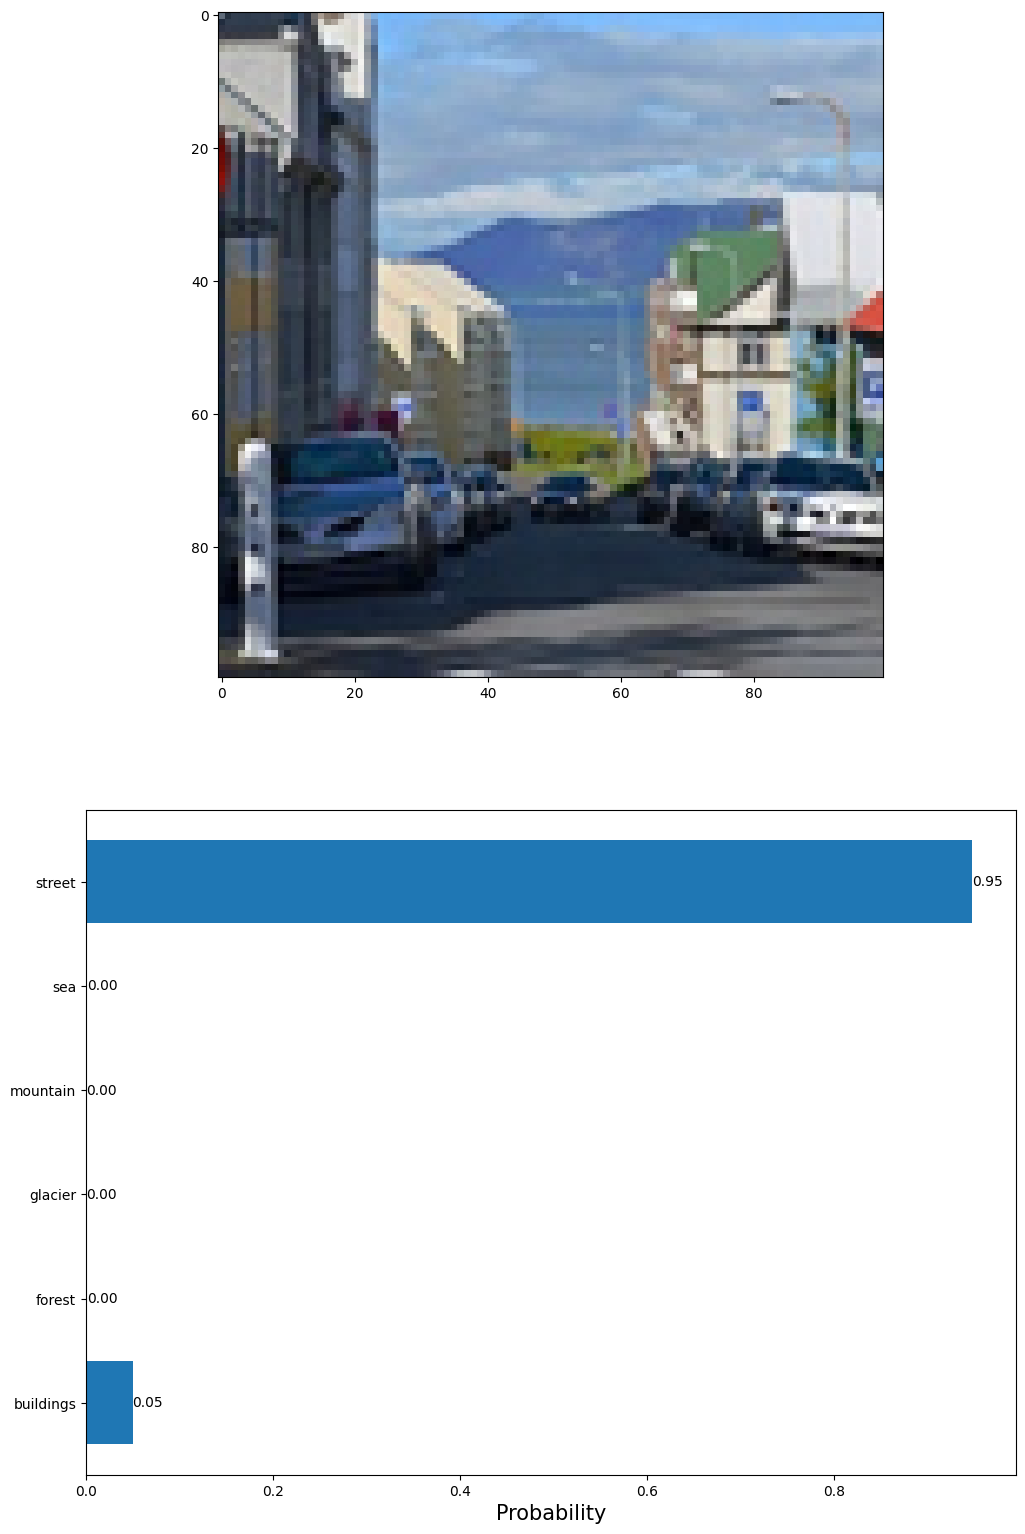

In [23]:
predict(r'E:\IBM Machine Learning Course\5. DeepLearning Machine Learning\Final project\archive\seg_train\seg_train\street\12.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


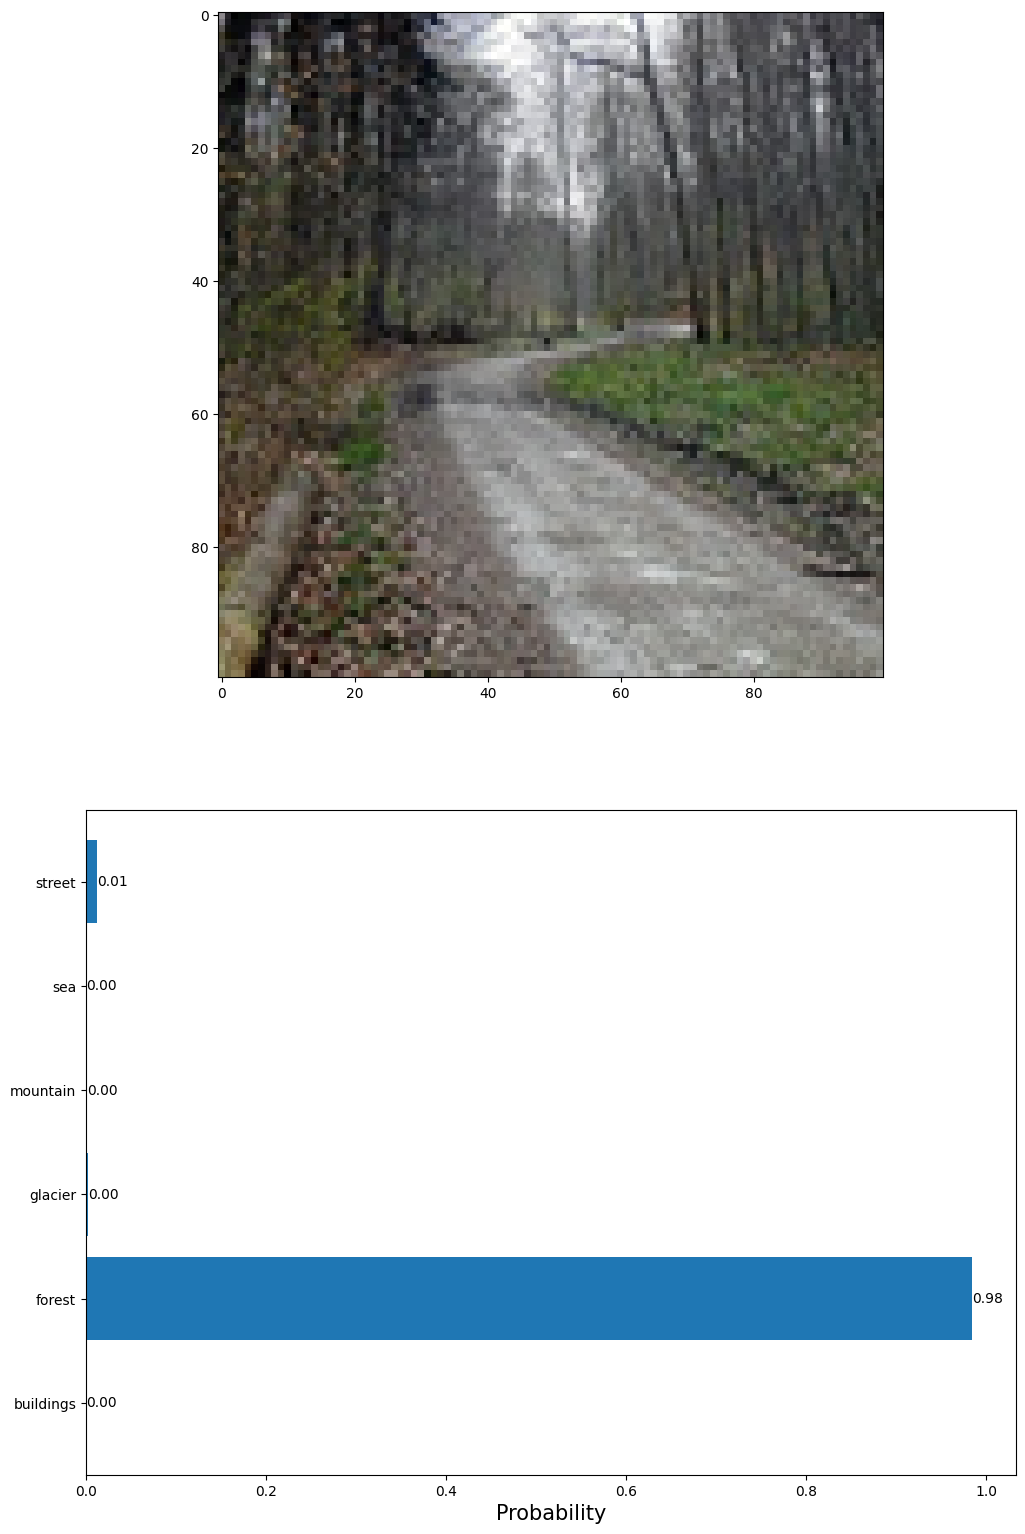

In [24]:
predict(r'E:\IBM Machine Learning Course\5. DeepLearning Machine Learning\Final project\archive\seg_train\seg_train\forest\131.jpg')

### Train the model with early stoping function

In [25]:
model_2 = Sequential([
    Conv2D(64, kernel_size= (3,3),padding='same', activation='relu', input_shape=(100,100,3)),
    Conv2D(64, kernel_size= (3,3),padding='same', activation='relu'),
   
    MaxPooling2D((2,2)),

    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
   
    MaxPooling2D((2,2)),


    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(128, kernel_size= (3,3),padding='same', activation='relu'),
   
    MaxPooling2D((2,2)),

    Conv2D(256, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(256, kernel_size= (3,3),padding='same', activation='relu'),
    
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
  
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
    Conv2D(512, kernel_size= (3,3),padding='same', activation='relu'),
  
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')])

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,848,326 (37.57 MB)

 Trainable params: 9,848,326 (37.57 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(train_generator,
     epochs=20,
    validation_data=validation_generator,
        callbacks=[early_stopping])

Epoch 1/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 859s 975ms/step - accuracy: 0.3690 - loss: 1.5248 - val_accuracy: 0.5910 - val_loss: 1.0278
Epoch 2/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 836s 952ms/step - accuracy: 0.5902 - loss: 1.0467 - val_accuracy: 0.6630 - val_loss: 0.8629
Epoch 3/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 852s 971ms/step - accuracy: 0.6546 - loss: 0.9136 - val_accuracy: 0.7077 - val_loss: 0.8118
Epoch 4/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 800s 911ms/step - accuracy: 0.7093 - loss: 0.8069 - val_accuracy: 0.7693 - val_loss: 0.6432
Epoch 5/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 815s 928ms/step - accuracy: 0.7627 - loss: 0.6837 - val_accuracy: 0.8003 - val_loss: 0.5657
Epoch 6/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 915s 1s/step - accuracy: 0.7976 - loss: 0.6036 - val_accuracy: 0.8350 - val_loss: 0.4684
Epoch 7/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 1002s 1s/step - accuracy: 0.8213 - loss: 0.5476 - val_accuracy: 0.8057 - val_loss: 0.5492
Epoch 8/20
878/878 ━━━━━━━━━━━━━━━━━━━━ 789s 899ms/step - accuracy: 0.8245 - loss

Plot the train validate the accuracy over epoch

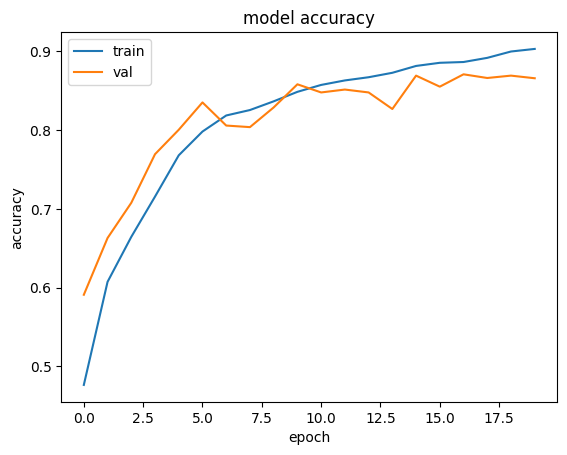

In [28]:
plt.plot(model_2.history.history['accuracy'])
plt.plot(model_2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

Plot a confusion metrix to evaluate the model performance

188/188 ━━━━━━━━━━━━━━━━━━━━ 57s 296ms/step


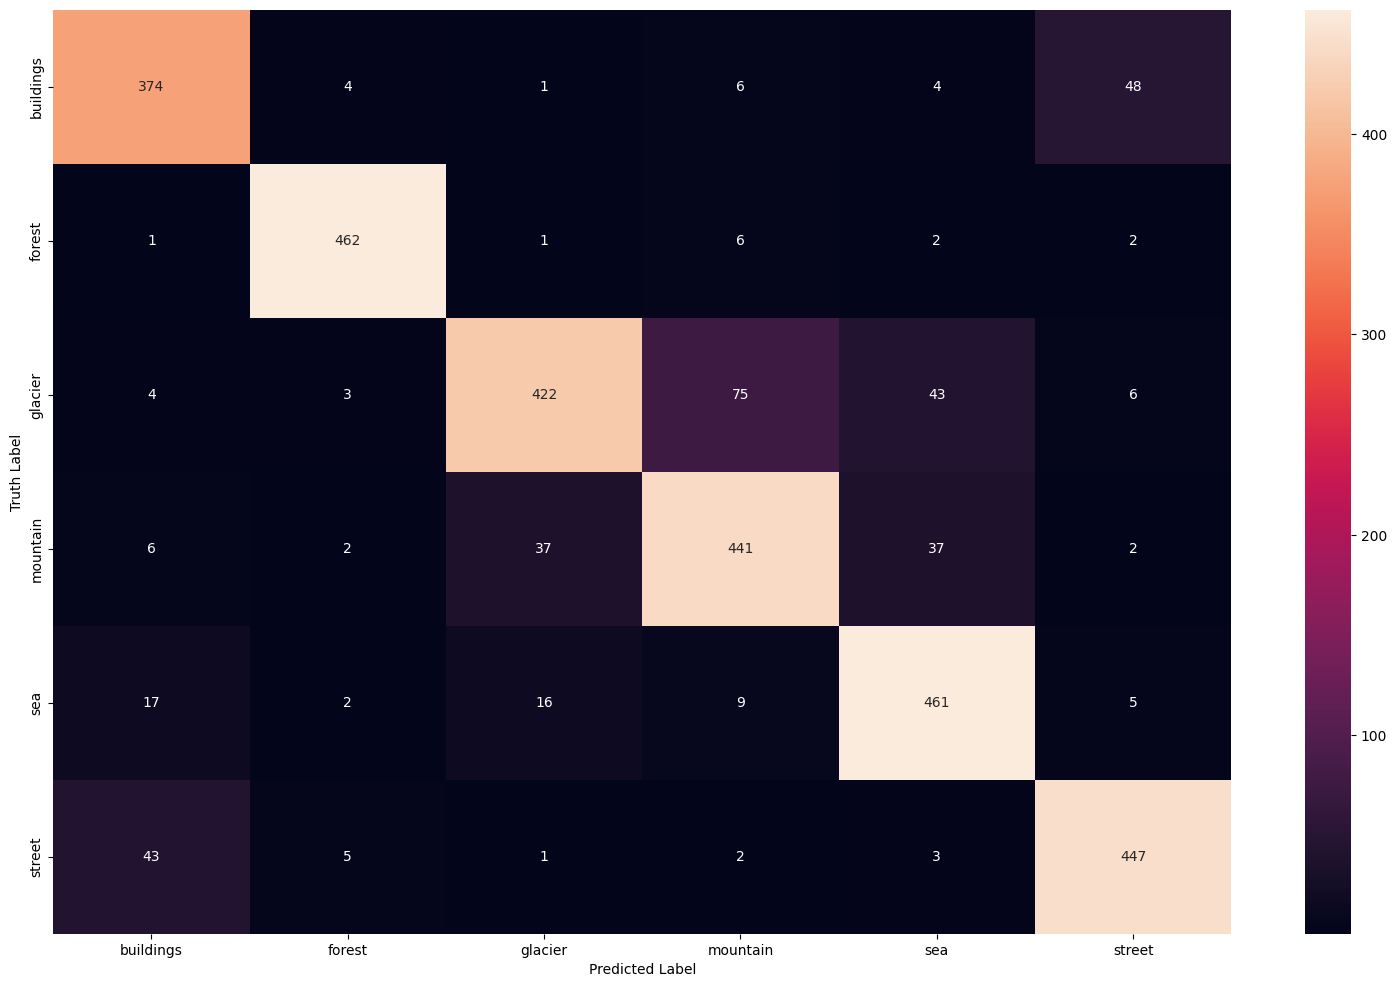

In [29]:
preds = model_2.predict(test_generator)
preds = np.argmax(preds, axis=1)

cm = confusion_matrix(validation_generator.classes, preds)
labels = list(classes.keys())
plt.figure(figsize=(19,12))
sns.heatmap(cm, annot=True, fmt='d',  xticklabels=classes.values(), yticklabels=classes.values())
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [30]:
loss, accuracy = model_2.evaluate(train_generator)
print(f'Train accuracy: {accuracy * 100:.2f}%')

878/878 ━━━━━━━━━━━━━━━━━━━━ 559s 636ms/step - accuracy: 0.9106 - loss: 0.2504
Train accuracy: 90.59%


## Summary and Conclusion

In this notebook, we have successfully built and trained a Convolutional Neural Network (CNN) to classify images into six different categories: buildings, forest, glacier, mountain, sea, and street. The following steps were undertaken:

1. **Data Preparation**: 
    - Loaded and preprocessed the image data using `ImageDataGenerator` for both training and testing datasets.
    - Visualized the distribution of images across different classes and displayed sample images from each class.

2. **Model Building**:
    - Constructed two CNN models using Keras' Sequential API. The first model was a simpler architecture, while the second model was more complex with additional layers.
    - Both models included convolutional layers, activation functions, pooling layers, dropout layers, and dense layers.

3. **Training**:
    - Trained the models using the RMSprop optimizer and categorical cross-entropy loss function.
    - Implemented early stopping and learning rate reduction callbacks to prevent overfitting and improve training efficiency.

4. **Evaluation**:
    - Evaluated the models on the test dataset and calculated the test accuracy and loss.
    - Visualized the training and validation accuracy and loss over epochs.
    - Plotted confusion matrices to analyze the performance of the models in detail.

5. **Prediction**:
    - Created a function to make predictions on new images and visualize the predicted probabilities.

### Results:
- The first model achieved a test accuracy of approximately 83.19%.
- The second model, which included early stopping, achieved a higher train accuracy of approximately 90.59%.

### Conclusion:
The CNN models demonstrated good performance in classifying images into the specified categories. The use of data augmentation, early stopping, and learning rate reduction contributed to the models' effectiveness. The confusion matrix provided insights into the specific areas where the models performed well and where there was room for improvement. Future work could involve further tuning of hyperparameters, experimenting with different architectures, and increasing the dataset size to enhance model performance.